In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols, glm


In [5]:
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

df=pd.DataFrame(data,columns=['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT'])

df['TARGET'] = target
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,TARGET
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


# 과제목표(요약통계)
 1. CHAS에 따른 집가격(target)의 평균, 표준편차, 중앙값을 구해라
 2. 선형 회귀분석 모델을 생성하고, 해당 모델을 사용하여 예측값을 구하라
 3. 새로운 데이터 2개를 사용하여 예측값을 구하라
 4. 부분회귀분석 시각화를 작성하여 독립변수들이 종속변수에 미치는 영향을 분석해라
  - 1개 독립변수 분석(plot_partregress)은 CRIM으로 한다
  - plot_partregress_gird()작성


In [6]:
df.groupby('CHAS')['TARGET'].agg({'mean', 'std','median'})


,median,mean,std
CHAS,,,
0.0,20.9,22.093843,8.831362
1.0,23.3,28.440000,11.816643


In [32]:
Rformula = 'TARGET ~ CRIM + ZN + INDUS + CHAS + NOX + RM + AGE + DIS + RAD + TAX + PTRATIO + B + LSTAT'
regression_result = ols(Rformula, data=df).fit()

In [33]:
regression_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 TARGET   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Wed, 12 Jul 2023   Prob (F-statistic):          6.72e-135
Time:                        13:43:08   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.4595      5.103      7.144      0.000      26.432      46.487
CRIM          -0.1080      0.033     -3.287      0.001      -0.173      -0.043
ZN             0.0464      0.014      3.382      0.001       0.019       0.073
INDUS          0.0206      0.061      0.334      0.738      -0.100       0.141
CHAS           2.6867      0.862      3.118      0.002       0.994       4.380
NOX          -17.7666      3.820     -4.651      0.000     -25.272     -10.262
RM             3.8099      0.418      9.116      0.000       2.989       4.631
AGE            0.0007      0.013      0.052      0.958      -0.025       0.027
DIS           -1.4756      0.199     -7.398      0.000      -1.867      -1.084
RAD            0.3060      0.066      4.613      0.000       0.176       0.436
TAX           -0.0123      0.004     -3.280      0.001      -0.020      -0.005
PTRATIO       -0.9527      0.131     -7.283      0.000      -1.210      -0.696
B              0.0093      0.003      3.467      0.001       0.004       0.015
LSTAT         -0.5248      0.051    -10.347      0.000      -0.624      -0.425
==============================================================================
Omnibus:                      178.041   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              783.126
Skew:                           1.521   Prob(JB):                    8.84e-171
Kurtosis:                       8.281   Cond. No.                     1.51e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [34]:
sample1= df[df.columns.difference(['TARGET'])]
sample1[:5]


,AGE,B,CHAS,CRIM,DIS,INDUS,LSTAT,NOX,PTRATIO,RAD,RM,TAX,ZN
0,65.2,396.90,0.0,0.00632,4.0900,2.31,4.98,0.538,15.3,1.0,6.575,296.0,18.0
1,78.9,396.90,0.0,0.02731,4.9671,7.07,9.14,0.469,17.8,2.0,6.421,242.0,0.0
2,61.1,392.83,0.0,0.02729,4.9671,7.07,4.03,0.469,17.8,2.0,7.185,242.0,0.0
3,45.8,394.63,0.0,0.03237,6.0622,2.18,2.94,0.458,18.7,3.0,6.998,222.0,0.0
4,54.2,396.90,0.0,0.06905,6.0622,2.18,5.33,0.458,18.7,3.0,7.147,222.0,0.0


In [35]:
sample1_predict=regression_result.predict(sample1)
print(sample1_predict)


0      30.003843
1      25.025562
2      30.567597
3      28.607036
4      27.943524
         ...    
501    23.533341
502    22.375719
503    27.627426
504    26.127967
505    22.344212
Length: 506, dtype: float64


In [49]:
data = {
    "CRIM" : [2,6],
    "ZN" : [1,2],
    "INDUS" : [3,4],
    "CHAS" : [5,6],
     "NOX" : [0.11,0.02],
    "RM" : [9,10],
    "AGE" : [61,72],
    "DIS" : [13,14],
    "RAD" : [15,16],
    "TAX" : [17,18],
    "PTRATIO" : [19,20],
    "B" : [21,22],
    "LSTAT" : [23,24]}

In [50]:
sample2= pd.DataFrame(data, columns=sample1.columns)
sample2_predict=regression_result.predict(sample2)
print(sample2_predict)

0    37.384507
1    42.472603
dtype: float64


In [38]:
data2 = {
    "CRIM" : [8.5, 8.1], 
    "ZN":[0.8, 0.5],
    "INDUS":[0.3, 0.4], 
    "CHAS":[6.1, 5.8], 
    "NOX":[0.055, 0.04], 
    "RM":[30.0, 31.0], 
    "AGE":[98.0,99], 
    "DIS":[0.996, 0.91], 
    "RAD":[3.25, 3.01], 
    "TAX":[0.4, 0.35],
    "PTRATIO":[9.0, 0.88],
    "B":[9.0, 0.88],
    "LSTAT":[9.0, 0.88]
    }

In [51]:
sample3= pd.DataFrame(data2, columns=sample1.columns)
sample3_predict=regression_result.predict(sample3)
print(sample3_predict)

0    151.666720
1    166.944889
dtype: float64


eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1


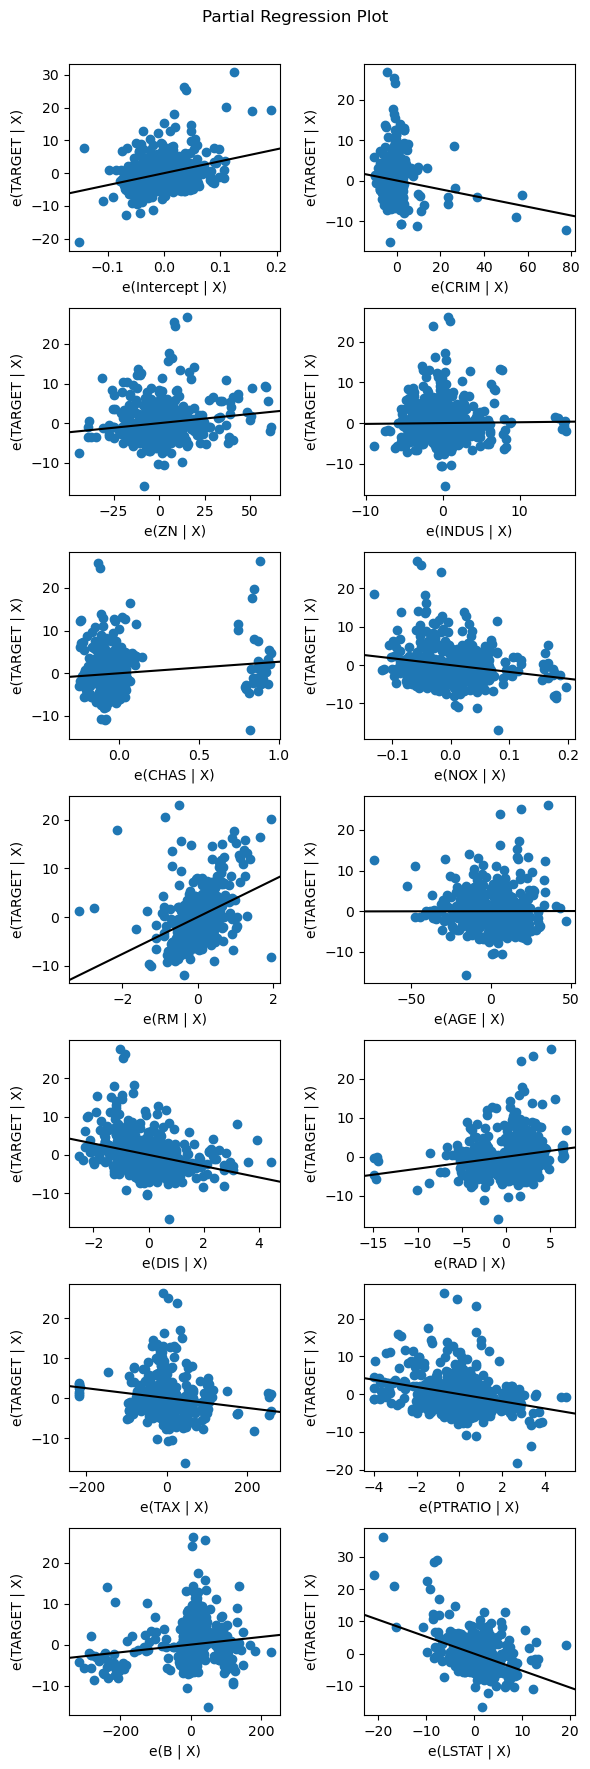

In [63]:
fig=plt.figure(figsize=(6,18))
#한꺼번에 보여주는것
sm.graphics.plot_partregress_grid(regression_result, fig=fig)
plt.show()

eval_env: 1


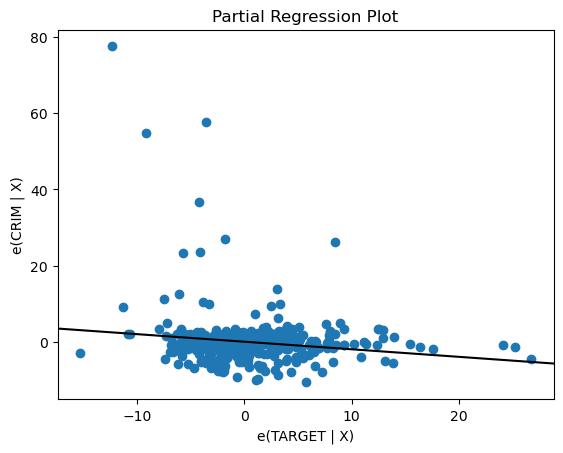

In [64]:
others = list(set(df.columns).difference(set(['TARGET', 'CRIM'])))
p, resids=sm.graphics.plot_partregress('CRIM', 'TARGET', others, data=df, ret_coords=True, obs_labels=False)
